># **Exploratory Data Analysis (EDA)**
>> # **Customer Churn DataSet**

>> **1.   Objective**

>>*   **To Identify Patterns and Insights**  









># **Import necessary libraries**

In [65]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.2 MB/s eta 0:00:00


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
import io

># ***Data Collection***
>> Load the dataset and review its structure.
>>### **Load The Dataset**

In [171]:
dataset = pd.read_csv('Telco_Customer_Churn_Dataset.csv')

>### ***Review Features and Target Variables***
>>### **Dataset Overview**

In [172]:
print("Dataset Overview:")
print(dataset.info())
print("\nFirst Few Rows of the Dataset:")
print(dataset.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

> # ***Data Preprocessing***
>> # **Identify the target variable and features**

In [173]:
target = 'Churn'
features = dataset.drop(columns=[target]).columns

>## **Check The DataTypes of Data Frame**

In [174]:
dataset.dtypes



,0
customerID,object
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


> ## **Find Descriptive Statistics**

In [175]:
dataset.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.435752,64.761692,2283.300441
std,25.075228,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,458.000000,118.750000,8684.800000


> ## **Check The Distribution of Target Variable**

In [176]:
dataset['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


># **Check Missing Values in the DataFrame**

In [177]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


># **Data Cleaning**
>>* **Handle Missing Values**
>>* **Separate Features and Target**

In [178]:
X = dataset.drop(columns=[target])
y = dataset[target]

># **Identify Categorical and Numerical Columns**

In [179]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns

># ***Impute Missing Values***

In [180]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

>## ***Combine Pre-Processing Pipelines into a ColumnTransformer***

In [181]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

>## **Preprocess Data**

In [182]:
X_preprocessed = preprocessor.fit_transform(X)

>## ***Convert TotalCharges to Numeric and Handle Missing Values***

In [183]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset.dropna(inplace=True)  # Drop rows with any NaN values

>## ***Handling Outliers using IQR***

In [184]:
def remove_outliers_iqr(dataset, numerical_features):
    for feature in numerical_features:
        Q1 = dataset[feature].quantile(0.25)
        Q3 = dataset[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[feature] >= lower_bound) & (dataset[feature] <= upper_bound)]
    return dataset

>## ***Identify numerical features***


In [185]:
numerical_features = dataset.select_dtypes(include=['number']).columns

>## ***Apply Outlier Removal***

In [186]:
dataset = remove_outliers_iqr(dataset, numerical_features)
print("\nDataset shape after removing outliers using IQR:")
print(dataset.shape)



Dataset shape after removing outliers using IQR:
(7031, 21)


>## ***Remove Missing Values***

In [187]:
#Removing missing values
dataset.dropna(how = 'any', inplace = True)

>## ***Check Missing Values***

In [188]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## ***Group The Tenure To Bins***


In [189]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

dataset['tenure_group'] = pd.cut(dataset.tenure, range(1, 80, 12), right=False, labels=labels)
dataset['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2174
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


># ***Exploratory Analysis***
>>### **Statistical Analysis**

In [190]:
print("\nStatistical Summary of the Dataset:")
print(dataset.describe())


Statistical Summary of the Dataset:
            tenure  MonthlyCharges  TotalCharges
count  7031.000000     7031.000000   7031.000000
mean     32.425971       64.796715   2283.590471
std      24.544497       30.087853   2266.802090
min       1.000000       18.250000     18.800000
25%       9.000000       35.575000    401.675000
50%      29.000000       70.350000   1397.650000
75%      55.000000       89.875000   3794.975000
max      72.000000      118.750000   8684.800000


# ***Create Plots***

In [191]:
def save_plot_as_image(filename):
    plt.savefig(filename)
    plt.close()

def show_plot():
    plt.show()

>>## ***Visualizations***
>>* **Distribution of Target Variable**

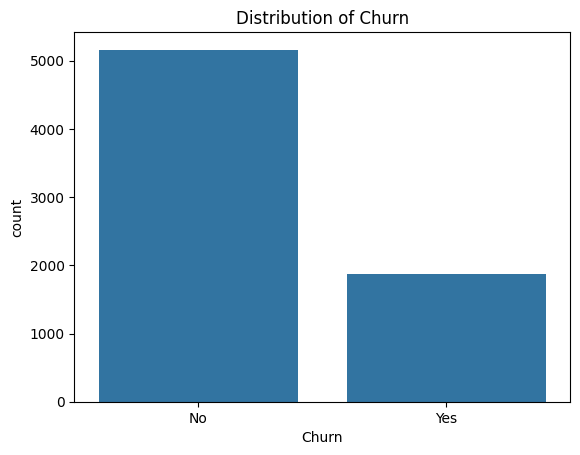

In [192]:
sns.countplot(x=target, data=dataset)

plt.title('Distribution of Churn')
show_plot()
save_plot_as_image('distribution_of_churn.png')



>>## ***Histograms For Numerical Features***

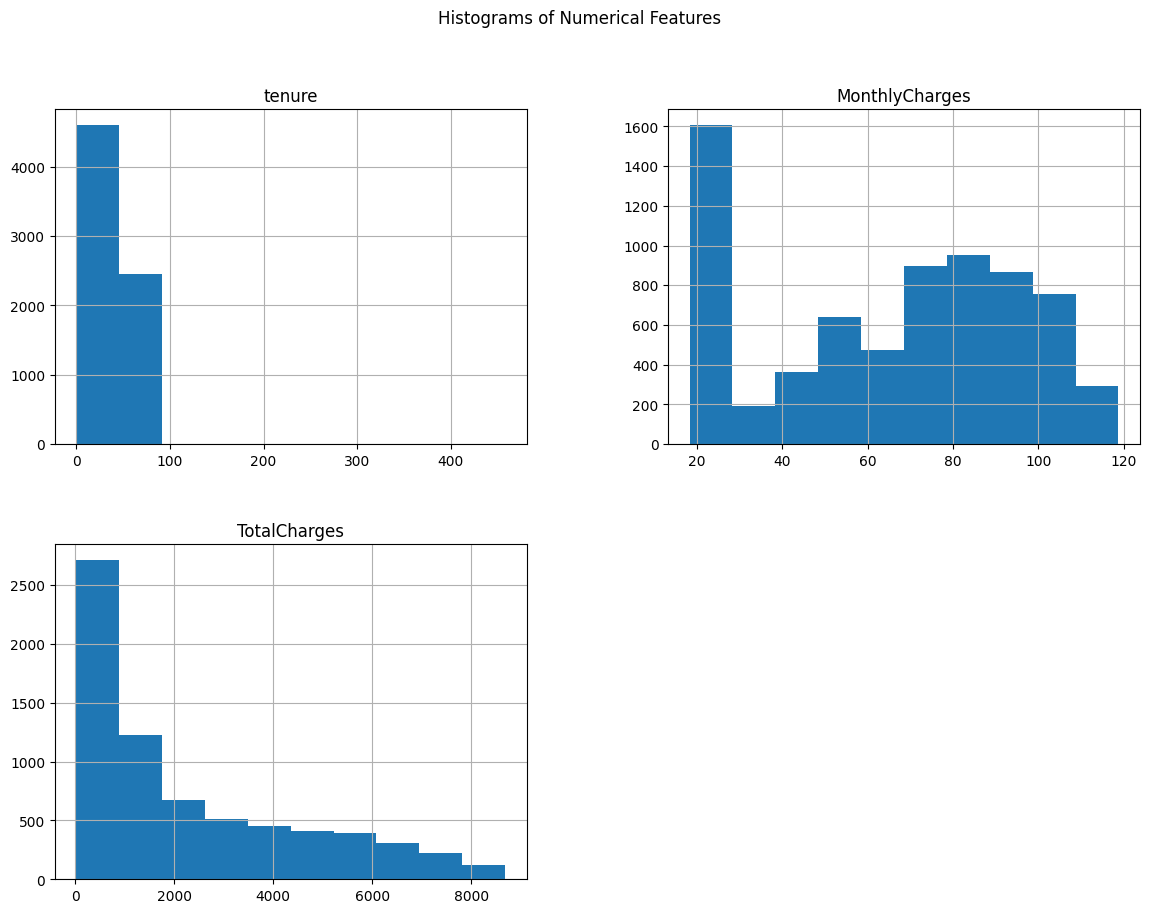

In [193]:
X[numerical_features].hist(figsize=(14, 10))
plt.suptitle('Histograms of Numerical Features')
show_plot()
save_plot_as_image('histograms_of_numerical_features.png')


>>## ***Scatter Plots To Identify Relationships***

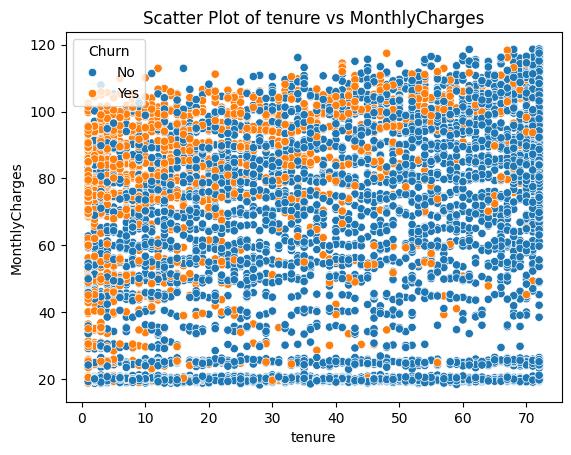

In [194]:
if len(numerical_features) >= 2:
    sns.scatterplot(x=numerical_features[0], y=numerical_features[1], hue=target, data=dataset)
    plt.title(f'Scatter Plot of {numerical_features[0]} vs {numerical_features[1]}')
    show_plot()
    save_plot_as_image('scatter_plot.png')

>># ***Correlation Matrix***

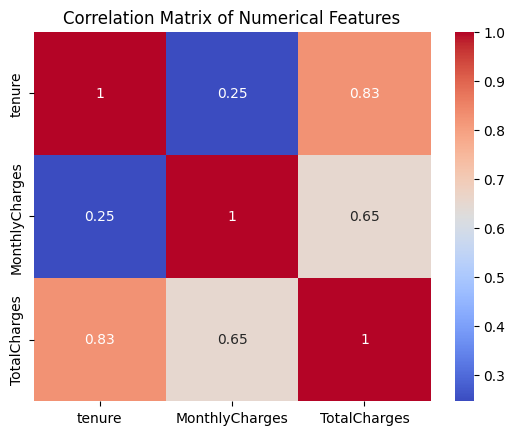

In [195]:
correlation_matrix = dataset[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
show_plot()
save_plot_as_image('correlation_matrix.png')

># ***Identify Patterns and Potential Predictors of Churn***
>* ***Create and Train a Machine Learning Model***

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

># ***Predict on the Test Set***

In [197]:
y_pred = model.predict(X_test)

> # ***Evaluate the Model***

In [198]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[957  79]
 [206 167]]


In [199]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1036
         Yes       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [200]:
# Feature importances (for RandomForestClassifier)
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    feature_names = np.concatenate([
        numerical_features,
        preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
    ])
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print("\nFeature Importances:")
    print(feature_importance_df)
    feature_importance_df.to_csv('feature_importances.csv', index=False)



Feature Importances:
                             Feature  Importance
2                       TotalCharges    0.100203
0                             tenure    0.093863
1                     MonthlyCharges    0.082563
7070  PaymentMethod_Electronic check    0.026752
7052     InternetService_Fiber optic    0.025405
...                              ...         ...
5367           customerID_7576-JMYWV    0.000000
5364           customerID_7571-YXDAD    0.000000
2122           customerID_3049-NDXFL    0.000000
5362           customerID_7569-NMZYQ    0.000000
22             customerID_0023-UYUPN    0.000000

[7072 rows x 2 columns]


># ***Plot Feature Importances***

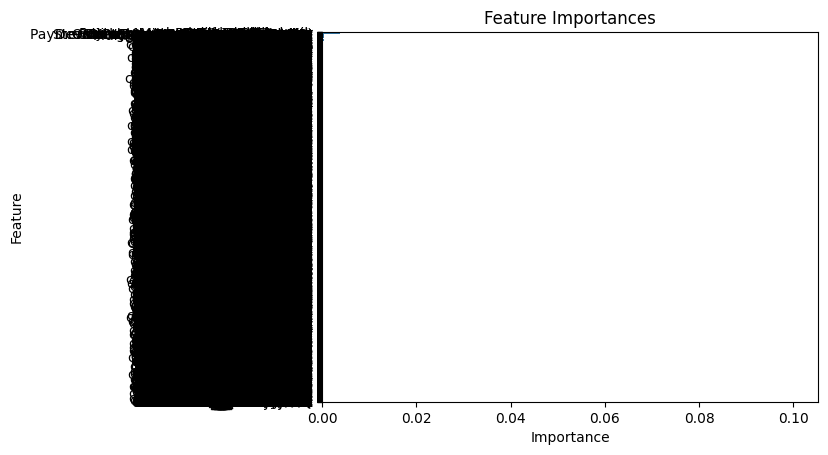

In [201]:
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
  plt.title('Feature Importances')
  plt.show()

>> # ***Report Generation***



In [202]:
def create_pdf_report(filename):
    buffer = io.BytesIO()
    c = canvas.Canvas(buffer, pagesize=letter)
    width, height = letter

    # Title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Customer Churn Analysis Report")

    # Statistical Summary
    c.setFont("Helvetica-Bold", 12)
    c.drawString(1 * inch, height - 1.5 * inch, "Statistical Summary:")
    c.setFont("Helvetica", 10)
    summary_text = dataset.describe().to_string()

    # Create a text object for the summary
    text_object = c.beginText(1 * inch, height - 2 * inch)
    text_object.setFont("Helvetica", 10)
    text_object.setTextOrigin(1 * inch, height - 2 * inch)
    text_object.setLeading(12)  # Line spacing
    text_object.textLines(summary_text)
    c.drawText(text_object)

    # Check if we need a new page
    if height - 2 * inch - text_object.getY() < 1.5 * inch:
        c.showPage()
        c.setFont("Helvetica-Bold", 16)
        c.drawString(1 * inch, height - 1 * inch, "Customer Churn Analysis Report")
        c.setFont("Helvetica-Bold", 12)
        c.drawString(1 * inch, height - 1.5 * inch, "Statistical Summary:")
        c.setFont("Helvetica", 10)
        text_object.setTextOrigin(1 * inch, height - 2 * inch)
        c.drawText(text_object)

    # Model Evaluation
    c.showPage()
    c.setFont("Helvetica-Bold", 12)
    c.drawString(1 * inch, height - 1 * inch, "Model Evaluation:")
    c.setFont("Helvetica", 10)
    c.drawString(1 * inch, height - 1.5 * inch, "Confusion Matrix:")

    # Add confusion matrix text
    conf_matrix_text = str(conf_matrix)
    text_object = c.beginText(1 * inch, height - 2 * inch)
    text_object.setFont("Helvetica", 10)
    text_object.setTextOrigin(1 * inch, height - 2 * inch)
    text_object.setLeading(12)
    text_object.textLines(conf_matrix_text)
    c.drawText(text_object)

    c.drawString(1 * inch, height - 3 * inch, "Classification Report:")

    # Add classification report text
    class_report_text = class_report
    text_object = c.beginText(1 * inch, height - 3.5 * inch)
    text_object.setFont("Helvetica", 10)
    text_object.setTextOrigin(1 * inch, height - 3.5 * inch)
    text_object.setLeading(12)
    text_object.textLines(class_report_text)
    c.drawText(text_object)

    # Insert plots
    c.showPage()
    c.setFont("Helvetica-Bold", 12)
    c.drawString(1 * inch, height - 1 * inch, "Visualizations:")

    # Distribution of Churn
    c.drawImage('distribution_of_churn.png', 1 * inch, height - 2.5 * inch, width=5*inch, height=2*inch)

    # Histograms of Numerical Features
    c.drawImage('histograms_of_numerical_features.png', 1 * inch, height - 5.5 * inch, width=5*inch, height=2.5*inch)

    # Scatter Plot
    if len(numerical_features) >= 2:
        c.drawImage('scatter_plot.png', 1 * inch, height - 8.5 * inch, width=5*inch, height=2.5*inch)

    # Correlation Matrix
    c.drawImage('correlation_matrix.png', 1 * inch, height - 11.5 * inch, width=5*inch, height=2.5*inch)

    # Save PDF
    c.showPage()
    c.save()
    with open(filename, 'wb') as f:
        f.write(buffer.getvalue())

create_pdf_report('customer_churn_analysis_report.pdf')

print("Report has been generated and saved as 'customer_churn_analysis_report.pdf'.")


Report has been generated and saved as 'customer_churn_analysis_report.pdf'.
